In [1]:
import numpy as np
import tensorflow as tf
from utils import util_functions as utils

##### Implementation and usage of ProgressBoard Class

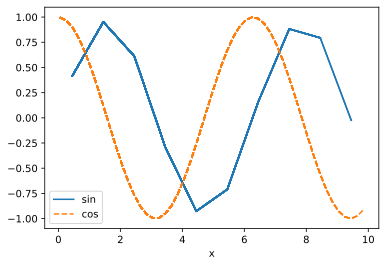

In [3]:
board = utils.ProgressBoard()
for x in np.arange(0, 10, 0.1):
  board.draw(x=x, y=np.sin(x), label='sin', every_n=10)
  board.draw(x=x, y=np.cos(x), label='cos', every_n=2)

##### DataModule Example Usage  
To perform Iterations over Dataset
Methods to define
1. __init__ function:
    a. Download the dataset
    b. Perform preprocessing and generate tensors pair (X, y) and num_train

2. get_dataloader function:
    a. use get_tensorloader function on generated tensors to get iterator over the dataset

In [9]:
class DataLoader(utils.DataModule):
  def __init__(self, w, b, noise=0.01, num_train=1000, num_val=1000, batch_size=32):
    super().__init__()
    self.save_hyperparameters()
    n = num_train + num_val
    self.X = tf.random.normal((n, w.shape[0]))
    noise = tf.random.normal((n, 1)) * noise
    self.y = tf.matmul(self.X, tf.reshape(w, (-1, 1))) + b + noise

  def get_dataloader(self, train):
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader(tensors=(self.X, self.y), train=train, indices=i)

In [10]:
data = DataLoader(w=tf.constant([2, -3.4]), b=4.2)
for X, y in data.train_dataloader():
  print('X Shape ', X.shape)
  print('Y Shape ', y.shape)
  break

X Shape  (32, 2)
Y Shape  (32, 1)


In [11]:
class FashionMNISTLoader(utils.DataModule):
  def __init__(self, batch_size=32):
    super().__init__()
    self.save_hyperparameters()
    train, val = tf.keras.datasets.fashion_mnist.load_data()
    X_train, Y_train = train
    X_val, Y_val = val
    self.num_train = X_train.shape[0]
    self.X = np.concatenate([X_train, X_val], axis=0)
    self.y = np.concatenate([Y_train, Y_val], axis=0)

  def get_dataloader(self, train):
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader(tensors=(self.X, self.y), train=train, indices=i)

In [12]:
data = FashionMNISTLoader()
for X, y in data.val_dataloader():
  print('X Shape ', X.shape)
  print('Y Shape ', y.shape)
  break

X Shape  (32, 28, 28)
Y Shape  (32,)


##### Module Class & Trainer Class Usage
Module Class:
1. Base Class for all Models
2. Methods to Define
   a. __init__ method:
    Declare all model parameters for barebone implementation  
    Define self.net for implementation based on keras API  

   b. forward method:  
    Define forward path calculation for barebone implementation  
    Not required for Keras API based implementation

   c.  loss method:
    Define method to compute loss based on output of forward pass/self.net  

3. Contains ProgressBoard Object
   which plots training and validation loss with epoch


Trainer Class:
1. Accepts obj of module class and datamodule class as input
2. Performs iteration over training and validation set
3. Calls optimizer defined in the module object & updated model params

In [13]:
class LinearRegressionScratch(utils.Module):
  def __init__(self, num_inputs, lr, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    w = tf.random.normal(shape=(num_inputs, 1), mean=0, stddev=0.01)
    b = tf.zeros(1)
    self.w = tf.Variable(w, trainable=True)
    self.b = tf.Variable(b, trainable=True)

  def forward(self, X):
    return tf.matmul(X, self.w) + self.b
  
  def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    loss = tf.reduce_mean(l)
    return loss

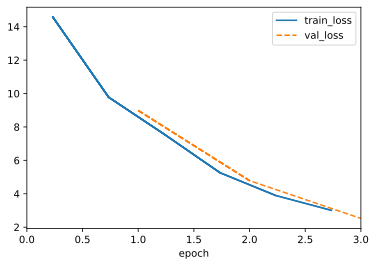

In [14]:
from utils import util_functions as utils

data = DataLoader(w=tf.constant([2, -3.4]), b=4.2)
model = LinearRegressionScratch(num_inputs=2, lr=0.01)
Trainer = utils.Trainer(max_epochs=3)

Trainer.fit(model=model, data=data)

In [15]:
class LinearRegression(utils.Module):
  """Linear Regression implemented with high level API"""
  def __init__(self, lr):
    super().__init__()
    self.save_hyperparameters()
    initializer = tf.random_normal_initializer(stddev=0.01)
    self.net = tf.keras.layers.Dense(units=1, kernel_initializer=initializer)

  def forward(self, X):
    return self.net(X)
  
  def loss(self, y_hat, y):
    fn = tf.keras.losses.MeanSquaredError()
    return fn(y, y_hat)

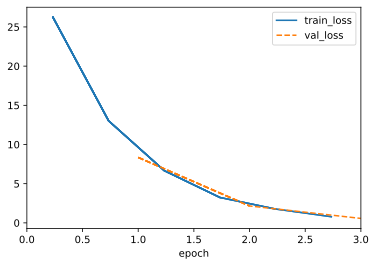

In [17]:
data = DataLoader(w=tf.constant([2, -3.4]), b=4.2)
model = LinearRegression(lr=0.01)
Trainer = utils.Trainer(max_epochs=3)

Trainer.fit(model=model, data=data)

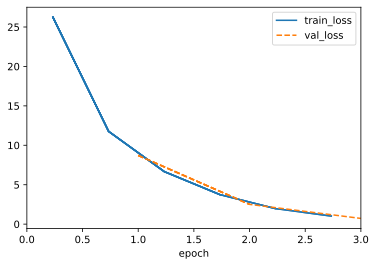

In [17]:
data = DataLoader(w=tf.constant([2, -3.4]), b=4.2)
model = LinearRegression(lr=0.01)
Trainer = utils.Trainer(max_epochs=3)

Trainer.fit(model=model, data=data)

## Additional Notes and Checks

In [4]:
train, val = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
tensors = train
tensors = tuple(a[slice(0, None)] for a in tensors)

In [6]:
type(tensors)

tuple

In [7]:
shuffle_buffer = tensors[0].shape[0] if train else 1
len(tf.data.Dataset.from_tensor_slices(tensors=tensors).shuffle(buffer_size=shuffle_buffer).batch(batch_size=30))

2000

In [8]:
for X, y in tf.data.Dataset.from_tensor_slices(tensors=tensors).shuffle(buffer_size=shuffle_buffer).batch(batch_size=30):
  print(X.shape)
  print(y.shape)
  break

(30, 28, 28)
(30,)


NameError: name 'tf' is not defined